In [0]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 8)

$Решить\; краевую\; задачу\; вcтроенным\; методом,\; методом\; стрельбы\; и\; сеточным\; методом: \\ $


$$y_{xx} + q(x)y_{x} - r(x)y = f(x) \\ $$

$q(x) = x^2 \\ 
r(x) = x \\ 
f(x) = \sqrt{x} \\ 
y(a = 0) = \alpha = 0 \\ 
y(b = 1) = \beta = 0 \\ 
$

$ \; $ 

# Встроенный метод

${{d^2 y} \over {dx^2}} = f(x) - q(x){{dy} \over {dx}} + r(x)y \\
\; \\
{{dy_1} \over {dx}} = y_2 \\
{{dy_2} \over {dx}} = f(x) - q(x)y_2 + r(x)y_1$

In [0]:
def func(x, y):
  q = x**2
  r = x
  f = np.sqrt(x)

  return np.vstack((y[1], f - q * y[1] + r * y[0]))

In [0]:
def boundary_conditions(ya, yb):
  return np.array([ya[0], yb[0]])

In [0]:
x = np.linspace(0, 1, 12)

In [0]:
y_1 = np.zeros((2, x.size))

In [6]:
y_1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
from scipy.integrate import solve_bvp

In [0]:
res_a = solve_bvp(func, boundary_conditions, x, y_1)

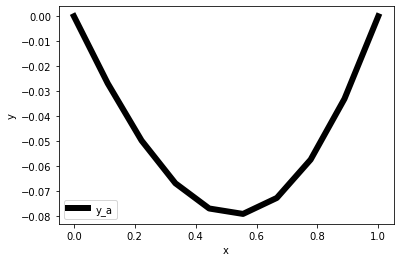

In [9]:
x_plot = np.linspace(0, 1, 10)
y_plot_a = res_a.sol(x_plot)[0]
plt.plot(x_plot, y_plot_a, label='y_a', linewidth = 6, color = 'black')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

$ \; $

# Метод стрельбы

$y(a) = \alpha \\
y(b)  = \beta \\
y'(a) = \widetilde \gamma \\
y'' + qy' - ry = f \\
\\
\; \\
y(x, \widetilde \gamma), \; y(b) = \beta, \; y(b, \widetilde \gamma) = \beta \\
\; \\
y(b, \widetilde \gamma_1) > \beta \\
y(b, \widetilde \gamma_2) < \beta \\ 
y(b, \widetilde \gamma_*) \approx \beta \\ 
$

In [0]:
def f_cauchy(y, x):
  q = x**2
  r = x
  f = np.sqrt(x)

  return (y[1], f - q * y[1] + r * y[0])

In [0]:
from scipy.integrate import ode, odeint

[[ 0.         -0.252     ]
 [-0.0269027  -0.22731318]
 [-0.04979633 -0.18226436]
 [-0.06693163 -0.12433096]
 [-0.0770691  -0.05675934]
 [-0.0792837   0.01786284]
 [-0.07293208  0.09700318]
 [-0.05765785  0.17801863]
 [-0.03340456  0.25816528]
 [-0.00042135  0.33471204]]


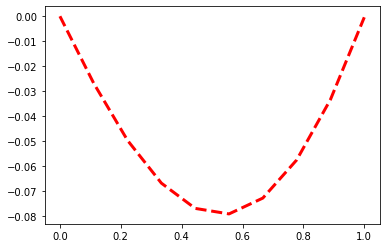

In [12]:
gamma = -0.252
y_a = [0, gamma]
x_a = np.linspace(0, 1, 10)
y_cauchy_a = odeint(f_cauchy, y_a, x_a)
# plt.plot(x_plot, y_plot_a, label='y_a', linewidth = 6, color = 'black')
plt.plot(x_a, y_cauchy_a[:, 0], label='y_b', linestyle='--', linewidth = 3, color = 'red')
print(y_cauchy_a)

In [0]:
x = np.linspace(0, 1, 12)
G = np.zeros(1000)
D = np.zeros(1000)
gam = -0.2
for i in range(1000):
  y_a = [0, gam]
  y_cauchy_a1 = odeint(f_cauchy, y_a, x)
  G[i] = gam
  D[i] = y_cauchy_a1[-1, 0]
  gam -= 0.01
  

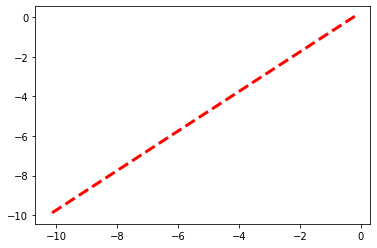

In [14]:
plt.plot(G, D, label='G_D', linestyle='--', linewidth = 3, color = 'red')

# Сеточный метод

$y'' + qy' - ry = f$

${{y_{i+1} - 2y_{i} + y_{i-1}} \over {h^2}} + q_{i} \cdot {{y_{i+1} -y_{i-1}} \over {2h}} - r_{i}y_{i} = f_{i} \\ 
y_{0} = \alpha \\
y_{N} = \beta$

$$(2 - q_{i}h)y_{i-1} - (4 + 2r_{i}h^2)y_{i} + (2 +q_{i}h)y_{i+1} = 2f_{i}h^2$$

$$A_{n,n} =
 \begin{pmatrix}
  y_{0} & y_{1} & y_{2} & y_{3} &  \cdots & y_{n} \\
  - & - & - & - &  - & - \\
  1 & 0 & 0 & 0 &  \cdots & 0 \\
  2-q_{1}h & -(4 + 2r_{1}h^2) & 2 + q_{1}h & 0 & \cdots & 0 \\
  0 & 2-q_{2}h & -(4 + 2r_{2}h^2) & 2 + q_{2}h & \cdots & 0 \\
  \vdots  & \vdots  & \vdots  & \vdots & \ddots & \vdots \\
  0 & 0 & 0 & 0 &  \cdots & 1 \\
 \end{pmatrix}$$

In [0]:
a = 0
b = 1

alpha = 0
beta = 0

n = 12
h = (b - a) / n
x = np.arange(a, b + h, h)

def q(x):
  return x**2

def r(x):
  return x

def f(x):
  return np.sqrt(x)


In [0]:
a = np.zeros([n + 1, n + 1])
a[0, 0] = 1
a[-1, -1] = 1

b = np.zeros(n + 1)
b[0] = alpha
b[-1] = beta

for i in range(1, n):
  a[i][i - 1] = 2 - q(x[i]) * h
  a[i][i] = -(4 + r(x[i]) * 2 * h**2)
  a[i][i + 1] = q(x[i]) * h + 2
  b[i] = f(x[i]) * 2  * h**2

In [17]:
x.size, a.size, b.size

(13, 169, 13)

In [0]:
y = np.linalg.solve(a, b)

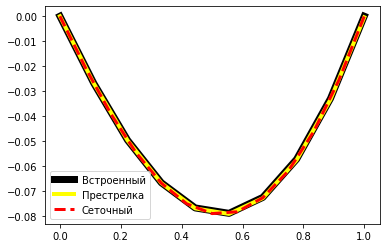

In [19]:
plt.plot(x_plot, y_plot_a, linewidth = 7, color = 'black', label='Встроенный')
plt.plot(x_a, y_cauchy_a[:, 0], linewidth = 4, color = 'yellow', label='Престрелка')
plt.plot(x, y, linewidth = 3, color = 'red', linestyle='--', label='Сеточный')
plt.legend()